In [210]:
from fdh_gallica import Periodical, Search, Document
from fdh_gallica.parallel_process import iiif_urls_for_documents

from tqdm.autonotebook import tqdm

import json
import pandas as pd
from pandas.io.json import json_normalize

In [211]:
%matplotlib inline

get all images with relevant query

In [212]:
re_execute = False
if re_execute:
    obj = Search(all_fields='atelier Nadar', dc_type='image', dc_creator='Atelier Nadar')
    obj.execute()
    print(f'number of fetched documents: {len(obj.documents)}')
    print(f'total records {obj.total_records}')
    print('retry fetching ...')
    obj.retry()
    print(f'number of fetched documents: {len(obj.documents)}')

    df = json_normalize(json.loads(json.dumps(obj.records)))
    print('save documents to local')
    # list handling becomes a pain of we save as csv
    df.to_pickle('raw_df.pkl')

In [213]:
df = pd.read_pickle('raw_df.pkl')

parse identifier for easier access:

In [214]:
image_dataframe = pd.DataFrame(df['dc:identifier']\
                               .map(lambda x: x[0] if type(x) == list else x))\
                               .rename(columns={'dc:identifier':'identifier'})

df['id'] = image_dataframe

In [215]:
df.head()

,dc:creator,dc:date,dc:description,dc:format,dc:identifier,dc:language,dc:publisher,dc:relation,dc:rights,dc:source,dc:subject,dc:title,dc:type,id
0,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531634...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits du théâtre -- 19e siècle,"Holda. Eldorado : [photographie, tirage de dém...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b53163492h
1,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531634...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits du théâtre -- 19e siècle,"Supra. Opéra : [photographie, tirage de démons...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b531634912
2,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531638...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits de studio -- 19e siècle,"Bébé Ullmann : [photographie, tirage de démons...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b531638493
3,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531649...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits collectifs -- 19e siècle,"Groupe de paysannes : [photographie, tirage de...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b53164917p
4,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531688...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits du théâtre -- 19e siècle,"Me Debaude : [photographie, tirage de démonstr...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b531688758


### useless columns

Useless because identical for all images, 
remove them for ease of use, next ones contain all the same content

In [216]:
df['dc:rights'].value_counts()

[domaine public, public domain]    23550
Name: dc:rights, dtype: int64

In [217]:
df['dc:type'].value_counts()

[image fixe, image, still image, photographie, photograph]    23550
Name: dc:type, dtype: int64

In [218]:
df['dc:language'].value_counts()

[fre, français]              23545
Sans contenu linguistique        5
Name: dc:language, dtype: int64

In [219]:
df['dc:format'].value_counts()

[1 photogr. pos. sur papier albuminé : d'après nég. sur verre ; 14,5 x 10,5 cm, image/jpeg, Nombre total de vues : 1]                                              12563
[1 photogr. pos. sur papier albuminé : d'après nég. sur verre au gélatinobromure d'argent ; 14,5 x 10,5 cm, image/jpeg, Nombre total de vues : 1]                   3293
[1 photogr. pos. sur papier albuminé : d'après négatif sur verre ; 9,3 x 6 cm, image/jpeg, Nombre total de vues : 1]                                                2316
[1 photogr. pos. sur papier albuminé : d'après négatif sur verre ; 9.3 x 6 cm, image/jpeg, Nombre total de vues : 1]                                                1995
[1 photogr. pos. sur papier albuminé : d'après négatif sur verre ; 8,5 x 5,8 cm, image/jpeg, Nombre total de vues : 1]                                               991
[1 photogr. pos. sur papier albuminé : d'après négatif sur verre ; 22,3 x 16,2 cm, image/jpeg, Nombre total de vues : 1]                                   

In [220]:
df['dc:format'].map(lambda x: 'photo' in x[0]).value_counts()

True    23550
Name: dc:format, dtype: int64

Almost all are paper, except for a few:

In [221]:
df['dc:format'].map(lambda x: 'papier' in x[0]).value_counts()

True     23546
False        4
Name: dc:format, dtype: int64

In [222]:
df[~df['dc:format'].map(lambda x: 'papier' in x[0])].id

22695    https://gallica.bnf.fr/ark:/12148/btv1b100239339
23472    https://gallica.bnf.fr/ark:/12148/btv1b52502741s
23473    https://gallica.bnf.fr/ark:/12148/btv1b55009234k
23474    https://gallica.bnf.fr/ark:/12148/btv1b550092156
Name: id, dtype: object

we don't care about those, so remove:

In [223]:
df = df[df['dc:format'].map(lambda x: 'papier' in x[0])]

In [224]:
df['dc:identifier'].head()

0    [https://gallica.bnf.fr/ark:/12148/btv1b531634...
1    [https://gallica.bnf.fr/ark:/12148/btv1b531634...
2    [https://gallica.bnf.fr/ark:/12148/btv1b531638...
3    [https://gallica.bnf.fr/ark:/12148/btv1b531649...
4    [https://gallica.bnf.fr/ark:/12148/btv1b531688...
Name: dc:identifier, dtype: object

In [225]:
df['dc:identifier'].map(lambda x: x[0]).duplicated().value_counts()

False    23546
Name: dc:identifier, dtype: int64

In [226]:
df['dc:publisher'].value_counts()

Series([], Name: dc:publisher, dtype: int64)

### removing them

In [227]:
del df['dc:type']
del df['dc:language']
del df['dc:format']
del df['dc:identifier']
del df['dc:rights']
del df['dc:publisher']

# getting information about subjects

In [228]:
#some objects are stored as list, others arent, use if else to handle
df['subject_is_list'] = df['dc:subject'].map(lambda x: type(x) == list)

In [229]:
df['len_list'] = df[df.subject_is_list]['dc:subject'].map(len)

length is non uniform ... we will have to unnest

In [230]:
df.len_list.value_counts()

2.0    12845
3.0      748
4.0      239
5.0      233
6.0       10
7.0        9
Name: len_list, dtype: int64

In [231]:
df[df.subject_is_list]['dc:subject'].map(lambda x: x).value_counts().head()

[Bernhardt, Sarah (1844-1923) -- Portraits, Portraits du théâtre -- 19e siècle]          266
[Réjane (1856-1920) -- Portraits, Portraits du théâtre -- 19e siècle]                    118
[Théo, Louise (1854-1922) -- Portraits, Portraits du théâtre -- 19e siècle]              110
[Simon-Girard, Juliette (1859-1959) -- Portraits, Portraits du théâtre -- 19e siècle]     84
[Lantelme, Marie -- Portraits, Portraits du théâtre -- 19e siècle]                        83
Name: dc:subject, dtype: int64

unnest list to get better view

In [232]:
to_unnest = df[df.subject_is_list]['dc:subject'].tolist()
to_unnest = df[df.subject_is_list][['dc:subject', 'id']].apply(lambda x: (x['dc:subject'], x.id), axis=1).tolist()
unnested = [(i, id_) for (list_, id_) in to_unnest for i in list_]

we can also use the **title**, more about this later

In [233]:
df[~df.subject_is_list][['dc:subject', 'id', 'dc:title']].head()

,dc:subject,id,dc:title
0,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53163492h,"Holda. Eldorado : [photographie, tirage de dém..."
1,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531634912,"Supra. Opéra : [photographie, tirage de démons..."
2,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531638493,"Bébé Ullmann : [photographie, tirage de démons..."
3,Portraits collectifs -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53164917p,"Groupe de paysannes : [photographie, tirage de..."
4,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531688758,"Me Debaude : [photographie, tirage de démonstr..."


In [234]:
to_append = df[~df.subject_is_list][['dc:subject', 'id']].rename(columns={'dc:subject':'descriptor'})

In [235]:
unnested.__len__()

30178

In [236]:
subject_frame = pd.DataFrame(unnested, columns=['descriptor', 'id'])

In [237]:
subject_frame = pd.concat([subject_frame, to_append], sort=False)

In [238]:
subject_frame.count()

descriptor    39640
id            39640
dtype: int64

associate each descriptior of one object (given by id)

In [239]:
subject_frame.head()

,descriptor,id
0,"Auguez, Mathilde (1868-1955) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b53168872x
1,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53168872x
2,"Auguez, Mathilde (1868-1955) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b531688701
3,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531688701
4,"Bruant, Aristide (1851-1925) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b53171770j


do some keyword searching

In [240]:
subject_frame['19e'] = subject_frame.descriptor.map(lambda x: x[-len('-- 19e siècle'):] == '-- 19e siècle')
subject_frame['Portraits'] = subject_frame.descriptor.map(lambda x: 'portraits' in x.lower())

In [241]:
is_19e = subject_frame[subject_frame['19e']].id.unique()

In [242]:
subject_frame[subject_frame.Portraits].id.unique().__len__()

23250

In [243]:
portrait_ids = subject_frame[subject_frame.Portraits].id.unique()

dessin humoristiques & caricatures seams important

In [244]:
subject_frame[~subject_frame.id.isin(portrait_ids)].head()

,descriptor,id,19e,Portraits
98,"Offenbach, Jacques (1819-1880) -- Caricatures ...",https://gallica.bnf.fr/ark:/12148/btv1b53065466g,False,False
99,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53065466g,True,False
186,Clairville (1811-1879) -- Caricatures et dessi...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,False,False
187,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,True,False
194,"Crémieux, Adolphe (1796-1880) -- Caricatures e...",https://gallica.bnf.fr/ark:/12148/btv1b53065960p,False,False


we also get sculptures!

In [245]:
subject_frame[~subject_frame.id.isin(portrait_ids)].descriptor.value_counts().head()

Scènes théâtrales -- 19e siècle                        111
Sculpture de figures humaines                           57
Grévin, Alfred (1827-1892) -- Oeuvres -- Sculpture      53
Beer, Friedrich (1846-1912) -- Oeuvres -- Sculpture     53
Caricatures et dessins humoristiques -- 19e siècle      37
Name: descriptor, dtype: int64

In [246]:
subject_frame['caricature'] = subject_frame.descriptor.map(lambda x: 'Caricatures et dessins humoristiques' in x)

In [247]:
subject_frame[~subject_frame.id.isin(portrait_ids) & ~subject_frame.caricature].descriptor.value_counts().head()

Scènes théâtrales -- 19e siècle                        111
Sculpture de figures humaines                           57
Beer, Friedrich (1846-1912) -- Oeuvres -- Sculpture     53
Grévin, Alfred (1827-1892) -- Oeuvres -- Sculpture      53
Vues d'intérieur -- 19e siècle                          21
Name: descriptor, dtype: int64

## Extracting individual names:

In [248]:
import re

In [249]:
name = "Grévin, Alfred (1827-1892)"
name_2 = "Kallérgīs, Dīmī́trios (1803 (1982"
name_3 = 'Labounskaya, Marie -- Portraits'

In [250]:
len('ī́')

2

In [251]:
unicodedata.normalize('NFC', 'ī́')

'ī́'

In [252]:
import unicodedata

In [253]:
subject_frame['descriptor'] = subject_frame.descriptor.map(lambda x: unicodedata.normalize('NFC', x))

In [254]:
def find_names(name):
    matches = re.findall('([\w\'.-]* [\w\'.-]* [\w\'.]*|[\w\'.-]* [\w\'.]*|[\w\'.-]*|[\w\'.]*\, [\w\'.-]*[ \w\'.]+) \([\d]{2}', name)
    return [x for x in matches if len(x) > 0]

def find_names_undated(name):
    matches = re.findall('([\w\'.-]*|[\w\'.]*\, [\w\'.-]*[ \w\'.]+) -- Portraits', name)
    return [x for x in matches if len(x) > 0]

In [255]:
find_names(name), find_names(name_2), find_names_undated(name_3)

(['Grévin, Alfred'], ['trios', '03'], ['Labounskaya, Marie'])

In [256]:
subject_frame['subject_name'] = subject_frame.descriptor.map(find_names)

In [257]:
no_name = subject_frame.subject_name.map(len) == 0
subject_frame.loc[ no_name, 'subject_name'] = subject_frame[no_name].descriptor.map(find_names_undated)

In [258]:
no_name = subject_frame.subject_name.map(len) == 0

In [259]:
subject_frame[no_name]['descriptor'].drop_duplicates()

1          Portraits de studio -- 19e siècle
9         Portraits du théâtre -- 19e siècle
24           Scènes théâtrales -- 19e siècle
45                Cour et courtisans -- Iran
48                   Portraits -- 19e siècle
                        ...                 
650        Portraits équestres -- 19e siècle
3671             Expositions de photographie
4871    Portraits de plein air -- 19e siècle
6250                     Portraits de studio
8457                  Paysages -- 19e siècle
Name: descriptor, Length: 127, dtype: object

In [260]:
named_subjects = subject_frame[subject_frame.subject_name.map(len) > 0].id.unique()

number of images we can find a name to:

In [179]:
len(named_subjects)

13386

# at most 1837

In [180]:
subject_frame[subject_frame.subject_name.map(len) > 0].subject_name.map(str).unique().__len__()

1934

In [181]:
subject_frame[subject_frame.subject_name.map(len) > 0].id.unique().__len__()

13386

In [182]:
subject_frame.loc[~no_name, 'named_subject'] = subject_frame[~no_name].subject_name.map(lambda x: x[0])

In [183]:
subject_frame.named_subject.value_counts().head()

Bernhardt, Sarah    424
Réjane              168
Théo, Louise        148
Meyer, Emilie       136
Brasseur, Albert    115
Name: named_subject, dtype: int64

In [184]:
#explore_names[explore_names.index.map(len) < 10]

In [185]:
subject_frame.named_subject.unique().__len__()

1935

In [186]:
(subject_frame.named_subject.value_counts() > 1).value_counts()

True     1416
False     518
Name: named_subject, dtype: int64

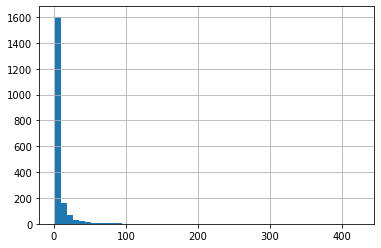

In [187]:
explore_names = subject_frame.named_subject.value_counts()
explore_names.hist(bins=50)

number of names we have:

In [188]:
subject_frame.named_subject.value_counts().count()

1934

In [189]:
subject_frame[subject_frame.named_subject.notna()].to_pickle('named_subject.pkl')

In [190]:
subject_frame[subject_frame.named_subject.notna()].named_subject.map(len).value_counts()

16    2177
15    1843
14    1842
13    1383
17    1237
12    1031
18     835
11     477
6      380
20     352
23     308
19     295
21     262
22     219
7      214
9      204
25     199
24     164
10     148
8      100
26      91
5       61
28      52
27      51
4       38
29      37
31      35
37      26
35      19
39      16
34      13
30      11
36       9
3        8
51       7
45       7
32       6
38       6
33       3
49       2
Name: named_subject, dtype: int64

how many resources does that correspond to:

In [191]:
id_identified = subject_frame[subject_frame.named_subject.notna()].id.unique()

In [192]:
subject_frame

,descriptor,id,19e,Portraits,caricature,subject_name,named_subject
0,"Auguez, Mathilde (1868-1955) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b53168872x,False,True,False,"[Auguez, Mathilde]","Auguez, Mathilde"
1,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53168872x,True,True,False,[],NaN
2,"Auguez, Mathilde (1868-1955) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b531688701,False,True,False,"[Auguez, Mathilde]","Auguez, Mathilde"
3,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531688701,True,True,False,[],NaN
4,"Bruant, Aristide (1851-1925) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b53171770j,False,True,False,"[Bruant, Aristide]","Bruant, Aristide"
...,...,...,...,...,...,...,...
23521,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53080156t,True,True,False,[],NaN
23523,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53080295d,True,True,False,[],NaN
23524,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531878387,True,True,False,[],NaN
23525,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531271160,True,True,False,[],NaN


In [193]:
subject_frame.dropna()[ (subject_frame.named_subject.dropna().map(len) < 6)].named_subject.value_counts()

Nadar    50
Luce     34
Gyp       8
Cham      3
Baron     3
Almée     3
Aimée     2
David     1
Varin     1
trios     1
Stop      1
Name: named_subject, dtype: int64

In [209]:
subject_frame[subject_frame.named_subject == 'Luce']

,descriptor,id,19e,Portraits,caricature,subject_name,named_subject
1799,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b53081502t,False,True,False,[Luce],Luce
2523,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b53081501c,False,True,False,[Luce],Luce
2561,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b53081506m,False,True,False,[Luce],Luce
2755,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b53081509z,False,True,False,[Luce],Luce
3290,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b530815144,False,True,False,[Luce],Luce
3799,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b530815055,False,True,False,[Luce],Luce
3869,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b53081504q,False,True,False,[Luce],Luce
3885,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b530815161,False,True,False,[Luce],Luce
4561,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b53081515k,False,True,False,[Luce],Luce
4583,Luce (18..-19.. ; actrice) -- Portraits,https://gallica.bnf.fr/ark:/12148/btv1b53081510b,False,True,False,[Luce],Luce


# about half of the images belong to known person

In [61]:
subject_frame[subject_frame.named_subject.notna()].id.unique().__len__()

13386

In [62]:
len(set(subject_frame.id.unique())) # nbr unique ids

23546

a lot of them don't tell us the name in the source, but it can be found in the title

In [63]:
len(set(subject_frame.id.unique()).difference(set(id_identified)))

10160

In [64]:
subject_frame[~subject_frame.id.isin(named_subjects)].descriptor.value_counts().head(10)

Portraits du théâtre -- 19e siècle    6138
Portraits de studio -- 19e siècle     2513
Portraits -- 19e siècle               1282
Scènes théâtrales -- 19e siècle        218
Portraits collectifs -- 19e siècle     214
Costumes -- 19e siècle                  79
Danseuses                               67
Lanvin (Maison de couture)              67
Enfants                                 55
Tournée Brasseur                        44
Name: descriptor, dtype: int64

In [65]:
subject_frame[~subject_frame.id.isin(portrait_ids) & ~subject_frame.id.isin(named_subjects)].descriptor.value_counts().head()

Scènes théâtrales -- 19e siècle                     111
Représentations d'objet -- 19e siècle                17
Représentations animalières -- 19e siècle            12
Tableaux vivants et mises en scène -- 19e siècle     10
Tournée Brasseur                                      8
Name: descriptor, dtype: int64

In [66]:
subject_frame[~subject_frame.id.isin(portrait_ids)].head()

,descriptor,id,19e,Portraits,caricature,subject_name,named_subject
98,"Offenbach, Jacques (1819-1880) -- Caricatures ...",https://gallica.bnf.fr/ark:/12148/btv1b53065466g,False,False,True,"[Offenbach, Jacques]","Offenbach, Jacques"
99,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53065466g,True,False,True,[],NaN
186,Clairville (1811-1879) -- Caricatures et dessi...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,False,False,True,[Clairville],Clairville
187,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,True,False,True,[],NaN
194,"Crémieux, Adolphe (1796-1880) -- Caricatures e...",https://gallica.bnf.fr/ark:/12148/btv1b53065960p,False,False,True,"[Crémieux, Adolphe]","Crémieux, Adolphe"


In [67]:
df['dc:title'].map(lambda x: len(x) if type(x) == list else 1).value_counts()

1    23514
2       32
Name: dc:title, dtype: int64

In [68]:
df['nbr_title'] = df['dc:title'].map(lambda x: len(x) if type(x) == list else 1)

In [69]:
df[df.nbr_title == 1]['dc:title'].sample(10).tolist()

['Marx : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Me Dezoder : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Mary Suzanne : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Me Darvilly : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'M. Simon Max. (Folies dramatiques) : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Mme Bourdelot. Cavaliéra [i.e. Cavalleria] rusticana : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'M. Hervé : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Monod. Pasteur : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Planel. Violoniste : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Peyra : [photographie, tirage de démonstration] / [Atelier Nadar]']

In [70]:
def find_names_title(name):
    return [x.strip() for x in re.findall('([\S\s ^(\:)]*) \: ', name) if len(x.strip()) > 0]

In [71]:
def extract_from_brackets(name):
    return re.findall('\[([\w \-\,\.]*)\]', name)

In [72]:
def fix_bad_naming(name):
    return re.sub('[\[\]]*', '', name)

In [73]:
text_1 = 'Huguet. Folies-Dramatiques. La petite fronde : [photographie, tirage de démonstration] / [Atelier Nadar]'

In [74]:
text_2 = 'Armand.[lol] Châtelet : [photographie :,'

In [75]:
fix_bad_naming(text_2)

'Armand.lol Châtelet : photographie :,'

In [76]:
extract_from_brackets(text_1)

['photographie, tirage de démonstration', 'Atelier Nadar']

In [77]:
df[df.nbr_title == 1]['dc:title'].map(extract_from_brackets).value_counts().head()

[photographie, tirage de démonstration, Atelier Nadar]                                           14929
[lle, photographie, tirage de démonstration, Atelier Nadar]                                       1008
[me, photographie, tirage de démonstration, Atelier Nadar]                                         110
[Renaissance. En scène, mesdemoiselles, photographie, tirage de démonstration, Atelier Nadar]       51
[i.e. Lantelme, photographie, tirage de démonstration, Atelier Nadar]                               45
Name: dc:title, dtype: int64

In [78]:
df.loc[df.nbr_title == 1, 'first_title'] = df[df.nbr_title == 1]['dc:title'].map(find_names_title)

In [79]:
df.first_title.dropna().map(len).value_counts()

1    23514
Name: first_title, dtype: int64

In [80]:
df[df.first_title.map(lambda x: len(x)==0 if type(x) ==list else False)]['dc:title'].tolist()

[]

In [81]:
df.loc[df.first_title.notna(), 'first_title'] = df[
    df.first_title.notna()].first_title.map(
    lambda x: fix_bad_naming(x[0]) if len(x)>0  else x)#.value_counts()

In [82]:
df.count()

dc:creator         23546
dc:date            23546
dc:description       179
dc:relation        23546
dc:source          23546
dc:subject         23546
dc:title           23546
id                 23546
subject_is_list    23546
len_list           14084
nbr_title          23546
first_title        23514
dtype: int64

In [83]:
df = pd.merge(df, subject_frame[['id', 'named_subject']].dropna(), on='id', how='outer')

In [84]:
df.count()

dc:creator         24328
dc:date            24328
dc:description       186
dc:relation        24328
dc:source          24328
dc:subject         24328
dc:title           24328
id                 24328
subject_is_list    24328
len_list           14866
nbr_title          24328
first_title        24296
named_subject      14168
dtype: int64

In [88]:
df[df.named_subject == "Louise"]

,dc:creator,dc:date,dc:description,dc:relation,dc:source,dc:subject,dc:title,id,subject_is_list,len_list,nbr_title,first_title,named_subject
4461,Atelier Nadar. Photographe,1900,NaN,[Extrait de : [Album de référence de l'Atelier...,"Bibliothèque nationale de France, département ...","[Arconati Visconti, Marie-Louise (1840-1923) -...","Melle Peyrat : [photographie, tirage de démons...",https://gallica.bnf.fr/ark:/12148/btv1b53065760x,True,2.0,1,Melle Peyrat,Louise
7275,Atelier Nadar. Photographe,1900,NaN,[Extrait de : [Album de référence de l'Atelier...,"Bibliothèque nationale de France, département ...","[Arconati Visconti, Marie-Louise (1840-1923) -...","Melle Peyrat, marquise Arconati Visconti : [ph...",https://gallica.bnf.fr/ark:/12148/btv1b530655605,True,2.0,1,"Melle Peyrat, marquise Arconati Visconti",Louise
16525,Atelier Nadar. Photographe,1900,NaN,[Extrait de : [Album de référence de l'Atelier...,"Bibliothèque nationale de France, département ...","[Arconati Visconti, Marie-Louise (1840-1923) -...","Melle Peyrat, marquise Arconati Visconti : [ph...",https://gallica.bnf.fr/ark:/12148/btv1b53065388t,True,2.0,1,"Melle Peyrat, marquise Arconati Visconti",Louise


In [85]:
df.loc[df.first_title.isna() & df['dc:title'].notna(), 'first_title'] = df[    df.first_title.isna( )& df['dc:title'].notna()]['dc:title'].map(lambda x: fix_bad_naming(find_names_title(x[0])[0])).tolist()

In [86]:
df[df.named_subject.isna()]['dc:subject'].value_counts().index.tolist().__len__()

117

In [87]:
df.named_subject.dropna().map(lambda x: 'Charlaviski' in x).value_counts()

False    14168
Name: named_subject, dtype: int64

In [88]:
df[df.first_title.notna() & df.named_subject.isna() & df['dc:subject'].map(lambda x: 'collectifs' in x)].first_title

3                                      Groupe de paysannes
24                     Groupe. Folies-Dramatiques. Juanita
103          Groupe de six acteurs. (Gaîté). "Le Talisman"
616                                   Société Colombophile
637                                              Pyrénéens
2247                      Groupe. En scène, mesdemoiselles
3054                       Rédaction du journal "Le Droit"
3306     Groupe. (Renaissance). "En scène, mesdemoiselles"
4217             Souris. Châtelet groupe d'enfants acteurs
5235     Mlles Barbier, Margueritte, Millia. Nouveau Ci...
6307                                  Congrès astronomique
6861                      Pons de Léon I. e. Ponce de Leon
7724                  Mis Pons de Léon i. e. Ponce de Leon
9090         Groupe. Renaissance. En scène, mesdemoiselles
9107                  Groupe. Renaissance. L'hôtel Godelot
10458       Groupe. (Renaissance). Les 12 femmes de Japhet
10465          Groupe petit Poucet. Gaîté. Le petit Pouc

## now that we have extracted names for most people, get years lived where available (from subject)

In [89]:
def get_years(string):
    x = re.findall('\(([\d{4}  -]+)\)', string)
    if len(x) == 0:
        return None
    return x[0]

def get_years_special(string):
    x = re.findall('\(([\d{4}\d{2}  -\.\?]+)[\S \;]*\)', string)
    if len(x) == 0:
        return None
    return x[0]

In [90]:
subject_frame['years'] = subject_frame.descriptor.map(get_years) 

In [91]:
get_years_special('Febvre, Paul (18..-1928)')

'18..-1928'

41 for which we can't find perfect match

In [92]:
unmatched = subject_frame.years.isna() & subject_frame.descriptor.map(lambda x: '(1' in x)
subject_frame[unmatched].count()

descriptor       3180
id               3180
19e              3180
Portraits        3180
caricature       3180
subject_name     3180
named_subject    3180
years               0
dtype: int64

In [93]:
subject_frame[unmatched].descriptor

12              Decroza, Francine (1868-19..) -- Portraits
23              Decroza, Francine (1868-19..) -- Portraits
26              Decroza, Francine (1868-19..) -- Portraits
34               Dauville, Louise (18..-19..) -- Portraits
44       Nâser ed-Din (1831-1896 ; shah d'Iran) -- Port...
                               ...                        
30148    Montbazon, Marie (18..-19.. ; actrice) -- Port...
30156    Baréty, Henriette (18..-19..? ; actrice) -- Po...
30158    Baréty, Henriette (18..-19..? ; actrice) -- Po...
30160    Baréty, Henriette (18..-19..? ; actrice) -- Po...
8294               Luco, François (18..-1882) -- Portraits
Name: descriptor, Length: 3180, dtype: object

In [94]:
subject_frame.loc[unmatched, 'years'] = subject_frame[unmatched].descriptor.map(get_years_special)

In [95]:
subject_frame[subject_frame.years.notna()].id.unique().__len__()

13051

In [96]:
id_years = subject_frame[subject_frame.years.notna()].id.unique()

In [97]:
df = pd.merge(df, subject_frame[['id', 'years']].dropna(), on='id', how='outer')

we never have more than one named individual ... it seems

In [98]:
(df.groupby(id).named_subject.count() > 1).value_counts()

False    26047
Name: named_subject, dtype: int64

# we can't get year or name of subject, who are we looking at

In [99]:
df[df.named_subject.isna() | df.years.isna()].count()

dc:creator         10495
dc:date            10495
dc:description       140
dc:relation        10495
dc:source          10495
dc:subject         10495
dc:title           10495
id                 10495
subject_is_list    10495
len_list            1039
nbr_title          10495
first_title        10495
named_subject        335
years                  0
dtype: int64

In [119]:
df[
    df.named_subject.isna() |\
    df.years.isna() &\
    df['dc:subject'].map(lambda x: 'Portraits de studio -- 19e siècle' in x) &\
    ~df['dc:subject'].map(lambda x: 'Théâtre' in x)
]['dc:title'].value_counts().sample(100)

[Kuschnichs]. Kosiki : [photographie, tirage de démonstration] / [Atelier Nadar]                                           1
Huguet. Folies-Dramatiques. [Riquet la houppe] : [photographie, tirage de démonstration] / [Atelier Nadar]                 1
M. Danversy [i.e. Danvers. Opéra-Comique. Tournée Brasseur] : [photographie, tirage de démonstration] / [Atelier Nadar]    1
Antonine : [photographie, tirage de démonstration] / [Atelier Nadar]                                                       1
Bébé X : [photographie, tirage de démonstration] / [Atelier Nadar]                                                         1
                                                                                                                          ..
Mlle Valduc. Gaîté. Bicyclistes en voyage : [photographie, tirage de démonstration] / [Atelier Nadar]                      1
Mlle Renée Vidal : [photographie, tirage de démonstration] / [Atelier Nadar]                                               1


In [101]:
matches = df['dc:title'].map(lambda x: re.match('(?!\:)([\s\S]*) :', str(x)))

In [102]:
df[matches.isna()]['dc:title']

Series([], Name: dc:title, dtype: object)

In [103]:
matches.dropna().map(lambda x: re.sub('\[|\]|\:', '', x.group(0))).value_counts().head(100).index.tolist()

['Statuettes Grévin ',
 'Rosa, Josepha ',
 'Groupes Théodora. Sarah Bernhardt et M. Laurent. Porte St Martin ',
 'Groupes Théodora. Porte St-Martin. Sarah Bernhardt et M. Laurent ',
 'Sarah Bernhardt. Porte Saint-Martin. La Tosca ',
 'Portrait composite des frères Reclus ',
 'Ghinassi ',
 'Groupe Poucet Albert, Duhamel, Christian, Scipion. Gaîté. Petit Poucet ',
 "Sarah Bernhardt. Porte Saint-Martin. Jeanne d'Arc ",
 'Chevreul père et fils, Nadar ',
 'H. Petit et Angelo. Ambigu. "Assommoir" ',
 'Depoix et Larcher. Menus Plaisirs. "Ma femme manque de chic" ',
 'Me Debriège ',
 'Mary Anderson. Anglaise ',
 'Febvre et Reichemberg i.e. Reichenberg. Français "L\'Ami Fritz" ',
 'Sarah Bernhardt ',
 'Sarah et Berton. Porte Saint-Martin. La Tosca ',
 'Deval et Max et Sarah Bernhardt. (Renaissance). "Gismonda" ',
 'Granier, Vauthier. Gaîté. Orphée aux enfers ',
 'Marie-Thérèse ',
 'Réjane ',
 'Mme Méaly et M. Fugère. (Gaîté). Le Talisman ',
 'Chevreul, Nadar ',
 'H. Petit et Gil Naza. Ambigu. "

In [104]:
def find_keywords(x):
    
    if not x:
        return x
    x = str(x)
    l = re.findall('(?!\d)[\w]*', x) # take all words, exclude years
    l = list(set([word for word in l if len(word) > 0])) # drop duplicates in one entry
    return l

In [105]:
tag_list = pd.Series([x for i in df['dc:subject'].map(find_keywords).tolist() for x in i]).value_counts().reset_index()

In [106]:
tag_list_title = pd.Series([x for i in df['dc:title'].map(find_keywords).tolist() for x in i]).value_counts().reset_index()

In [107]:
tag_list_title[tag_list_title['index'].map(lambda x: x.islower() and len(x) > 2)]['index'].head(30).tolist()

['démonstration',
 'tirage',
 'photographie',
 'lle',
 'aux',
 'fils',
 'femme',
 'des',
 'dans',
 'comique',
 'père',
 'dramatiques',
 'voyage',
 'une',
 'non',
 'général',
 'homme',
 'année',
 'scène',
 'mesdemoiselles',
 'peintre',
 'dramatique',
 'femmes',
 'cloches',
 'enfers',
 'lune',
 'rouge',
 'journaliste',
 'frères',
 'petite']

In [108]:
tag_list[tag_list['index'].map(lambda x: x.islower() and len(x) > 2)]['index'].tolist()

['siècle',
 'théâtre',
 'studio',
 'théâtrales',
 'collectifs',
 'actrice',
 'acteur',
 'lyrique',
 'artiste',
 'figures',
 'humaines',
 'siamois',
 'danseuse',
 'couture',
 'roi',
 'cantatrice',
 'humoristiques',
 'dessins',
 'chanteur',
 'japonais',
 'intérieur',
 'empereur',
 'des',
 'duc',
 'lieux',
 'shah',
 'acteurs',
 'familiers',
 'prince',
 'objet',
 'courtisans',
 'comte',
 'personnage',
 'animalières',
 'chanteuse',
 'russe',
 'fictif',
 'franco',
 'historiques',
 'marquis',
 'frères',
 'décès',
 'après',
 'grand',
 'mises',
 'vivants',
 'militaires',
 'scène',
 'directeur',
 'cirque',
 'ténor',
 'dessinateur',
 'orientale',
 'lithographe',
 'homme',
 'architecture',
 'domestique',
 'français',
 'dramatique',
 'ballon',
 'princesse',
 'équestres',
 'shows',
 'baron',
 'portée',
 'artistes',
 'jeunesse',
 'aéronaute',
 'chef',
 'duchesse',
 'médecin',
 'uruguayens',
 'travestis',
 'ebyšev',
 'van',
 'légendaire',
 'amiral',
 'race',
 'général',
 'chinois',
 'air',
 'abbé',
 '

### associate tags and ids in new dataframe. Remove useless tags. save tag-id association as json file

In [109]:
# clear useless tags 

from itertools import compress


def tag_exclude(tag):
    
    result = False
    if len(tag) < 3:
        result = False
    elif len(tag) == 3:
        if tag.islower() and tag != 'roi':
            result = False
        else:
            result = True
    else:
        # this list may change
        if tag in  ['siècle', 'Portraits', 'studio', 'Scènes', 'collectifs', 'photographie', 'Nadar']:
            result = False
        else:
            result = True
    return result

def tag_list_exclude(tag_list):
    mask = list(map(tag_exclude, tag_list))
    return list(compress(tag_list, mask))

In [110]:
tag_frame = pd.DataFrame(df.id)
tag_frame['tags'] = df['dc:subject'].map(find_keywords) + df['dc:title'].map(find_keywords)
tag_frame['tags'] = tag_frame['tags'].apply(lambda x: list(set(x)))
tag_frame['tags'] = tag_frame.tags.apply(tag_list_exclude)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [111]:
tag_explode = tag_frame.tags.apply(pd.Series) \
            .merge(tag_frame, right_index=True, left_index=True) \
            .drop(['tags'],axis=1) \
            .melt(id_vars=['id'], value_name='tag') \
            .drop('variable', axis=1) \

In [112]:
tag_ids = tag_explode.groupby(tag_explode.tag)['id'].unique().apply(list)

In [113]:
tag_ids.to_json('tag_ids.json')

### there really is no associated year

In [114]:
subject_frame[~subject_frame.id.isin(id_years) &\
              subject_frame.named_subject.isna() &\
              ~subject_frame.Portraits].descriptor.value_counts().index

Index(['Scènes théâtrales -- 19e siècle', 'Costumes -- 19e siècle',
       'Danseuses', 'Lanvin (Maison de couture)', 'Enfants',
       'Tournée Brasseur', 'Ambassadeurs japonais -- France', 'Trapézistes',
       'Représentations d'objet -- 19e siècle', 'Cour et courtisans -- Iran',
       'Clowns', 'Cavalières', 'Violonistes',
       'Représentations animalières -- 19e siècle', 'Travestis', 'Singes',
       'Nourrissons', 'Bicyclettes',
       'Tableaux vivants et mises en scène -- 19e siècle', 'Enfants acteurs',
       'Géants', 'Ballons -- France -- 19e siècle', 'Danse orientale',
       'Mandoline', 'Vues d'intérieur -- 19e siècle', 'Costumes',
       'Journaux français', 'Chat domestique', 'Bicyclettes -- Au théâtre',
       'Animaux de cirque', 'Pierrot (personnage fictif)', 'Escrimeurs',
       'Géant (ballon)', 'Minstrel shows', 'Âne', 'Chien', 'Haltérophiles',
       'Religieux', 'Représentations animalières -- 1870-1913',
       'Hamlet (personnage légendaire)', 'Ambassadeurs

In [115]:
df[df.first_title.notna() & df.named_subject.notna()][['first_title', 'named_subject']]

,first_title,named_subject
7,Me Auguez,"Auguez, Mathilde"
8,Me Auguez,"Auguez, Mathilde"
9,M. Bruant,"Bruant, Aristide"
10,Me Auguez,"Auguez, Mathilde"
13,M. A. Brasseur,"Brasseur, Albert"
...,...,...
26041,"Desclauzas. ""Rendez-vous bourgeois""","Desclauzas, Marie"
26043,Feighine i.e. Feyghine,Feyghine
26044,Fayolles i.e. Baretta,"Barretta, Blanche"
26045,"Daubray. Bouffes. ""Petite Muette""",Daubray


In [116]:
df[df.first_title.notna() & df.named_subject.notna()].named_subject.value_counts()

Bernhardt, Sarah               496
Réjane                         186
Meyer, Emilie                  171
Théo, Louise                   152
Brasseur, Albert               142
                              ... 
Wilfrid de                       1
Kaemmerer, Frederik Hendrik      1
Lurine, Louis                    1
Bouguereau, William              1
Grisier, Augustin                1
Name: named_subject, Length: 1854, dtype: int64

In [117]:
df[df.first_title.notna() & df.named_subject.notna()].named_subject.count()

15887

In [118]:
df[df.first_title.notna() & df.named_subject.isna()].first_title.value_counts().head(30).index.tolist()

['Ghinassi',
 'Marie-Thérèse',
 'Ambassade japonaise',
 'Modes Lanvin',
 'Gabrielle',
 'Marie-Thérèse. Variétés',
 "Portrait d'une femme",
 "Portrait d'un homme",
 "Portrait d'une femme non identifiée",
 'Jaeger',
 'Andrée Dalti',
 'Me Cernay',
 'Soukaret. 1er prix de beauté de Spa',
 'Loetitia. Châtelet. "La queue du chat"',
 'Mme Prelly. Folies dramatiques',
 'Potter i.e. Potters',
 'Mlle Engalli',
 'Modes. Lanvin',
 'Me Rivolta',
 'Laurence',
 'Me Demoreuil',
 'Lhéry',
 'Engally. Opéra comique',
 'Me de Nory',
 'Paulette',
 'Mlle Stuart',
 'Mlle Gabrielle',
 'Me de Breuil',
 'Beaumaine. Variétés',
 'Jaeger. Eden']